In [1]:
from rdkit import Chem
import pandas as pd
from tqdm.auto import tqdm
from rdkit.Chem import AllChem

In [2]:
tqdm.pandas()

In [3]:
df = pd.read_csv("ZINC_lt_250.csv")

In [4]:
df['mol'] = df.SMILES.progress_apply(Chem.MolFromSmiles)

  0%|          | 0/855655 [00:00<?, ?it/s]

[06:11:21] Explicit valence for atom # 1 Sn, 5, is greater than permitted
[06:11:37] Explicit valence for atom # 2 Sn, 5, is greater than permitted
[06:11:43] Explicit valence for atom # 3 Sn, 5, is greater than permitted


In [7]:
df.dropna(subset="mol",inplace=True)

In [8]:
qmol = Chem.MolFromSmarts("cB(O)(O)")

In [108]:
df['match'] = [x.HasSubstructMatch(qmol) for x in df.mol]

In [109]:
df.query("match")

,SMILES,Name,mol,match
7538,O=C(O)Cc1cccc2c1B(O)OC2,201306018,<rdkit.Chem.rdchem.Mol object at 0x16fcbfc30>,True
7801,O=C(O)c1ccc2c(c1)COB2O,170019948,<rdkit.Chem.rdchem.Mol object at 0x16fcc7060>,True
9408,COC(=O)c1ccc2c(c1)B(O)OC2,393608591,<rdkit.Chem.rdchem.Mol object at 0x16fcf3680>,True
9523,Nc1ccc2c(c1)COB2O,202969891,<rdkit.Chem.rdchem.Mol object at 0x16fcf6960>,True
10170,OB1OCc2cc3c(cc21)OCCO3,393605211,<rdkit.Chem.rdchem.Mol object at 0x30f2e8740>,True
...,...,...,...,...
764028,CC1(C)OB(c2cc(C3CCC3)co2)OC1(C)C,198095879,<rdkit.Chem.rdchem.Mol object at 0x3a1554740>,True
809486,CC(C)c1ccccc1B1OC(C)(C)C(C)(C)O1,169975935,<rdkit.Chem.rdchem.Mol object at 0x3a763a6c0>,True
809624,CC(C)c1ccc(B2OC(C)(C)C(C)(C)O2)cc1,169935824,<rdkit.Chem.rdchem.Mol object at 0x3a763e3b0>,True
810375,CC(C)c1cccc(B2OC(C)(C)C(C)(C)O2)c1,169935828,<rdkit.Chem.rdchem.Mol object at 0x3a7652f10>,True


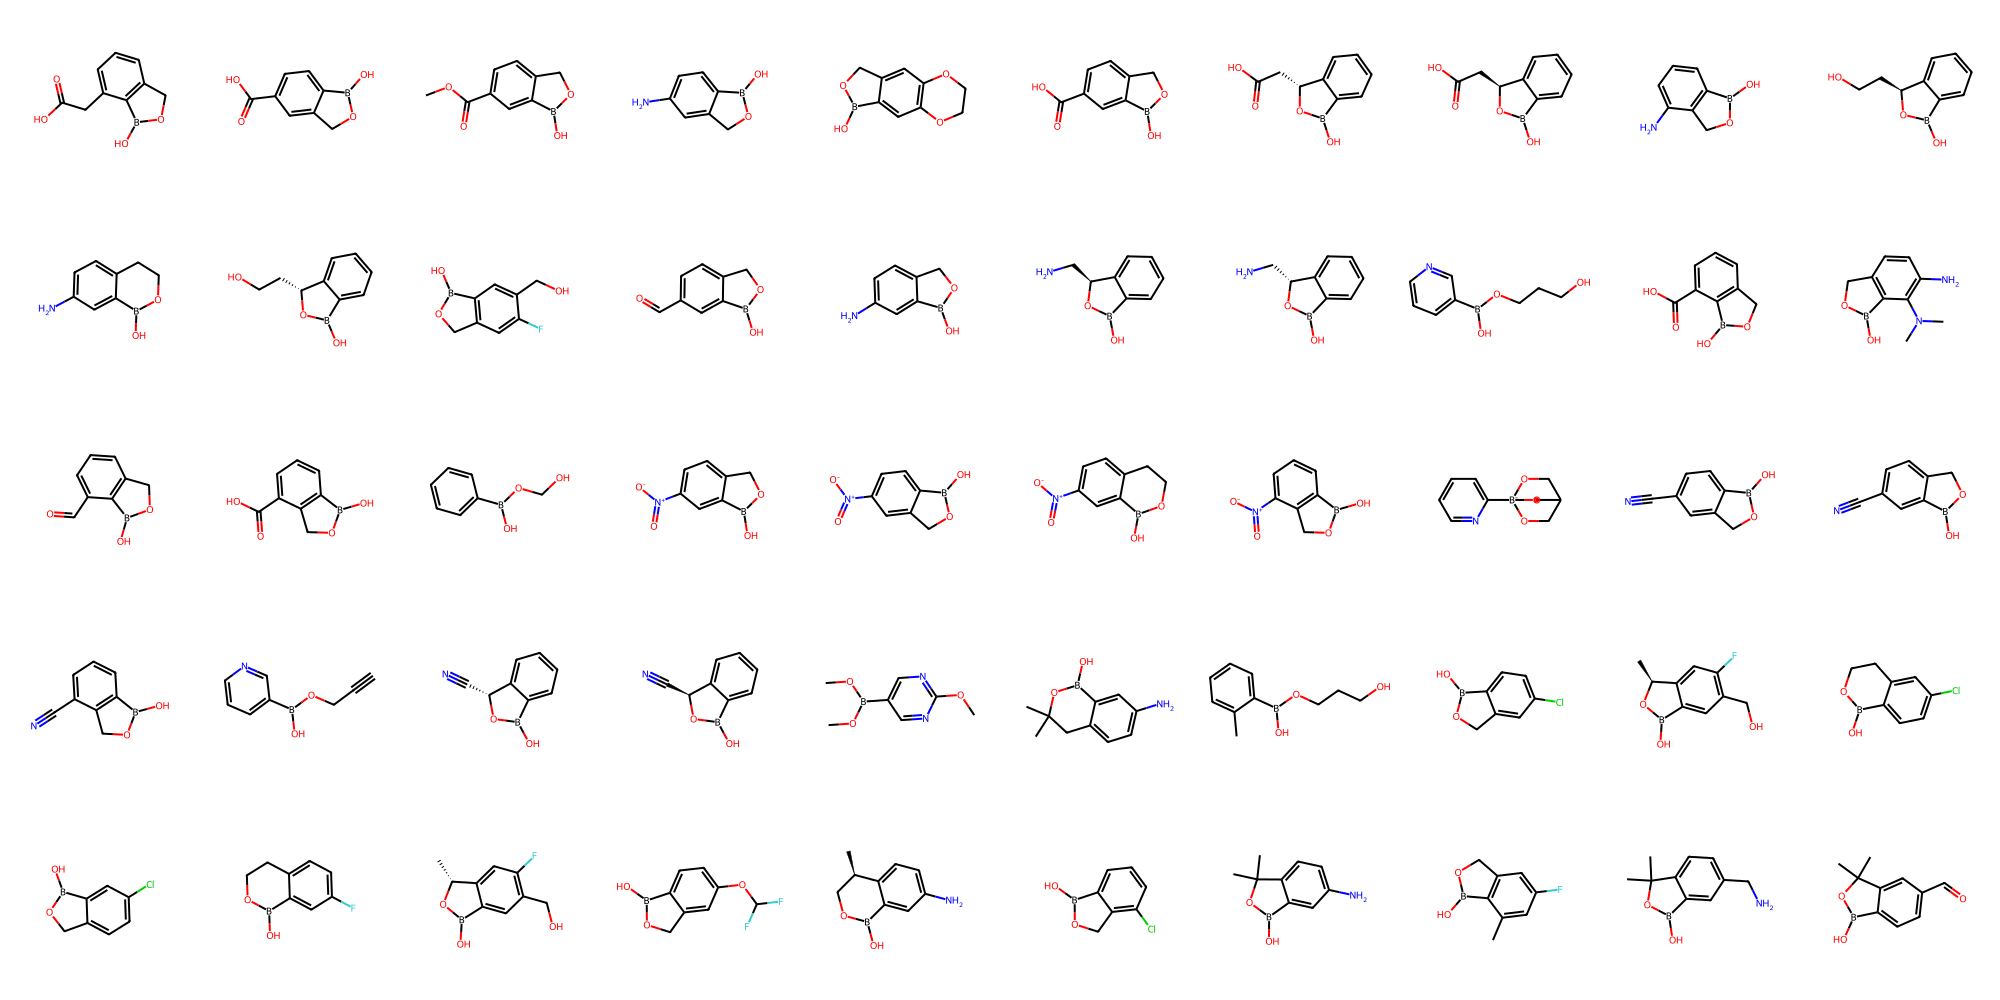

In [11]:
Chem.Draw.MolsToGridImage(df.query('match').mol.values[:50],molsPerRow=10)

In [112]:
len(boronate_df)

1172

In [115]:
res = []
for mol in boronate_df.mol:
    res.append(boronate_rxn.RunReactants([mol]))

In [116]:
res

[((<rdkit.Chem.rdchem.Mol at 0x3afcd28f0>,),),
 ((<rdkit.Chem.rdchem.Mol at 0x3afcd2880>,),),
 ((<rdkit.Chem.rdchem.Mol at 0x3afcd29d0>,),),
 ((<rdkit.Chem.rdchem.Mol at 0x3afcd2b20>,),),
 ((<rdkit.Chem.rdchem.Mol at 0x3afcd2b90>,),),
 ((<rdkit.Chem.rdchem.Mol at 0x3afcd2c00>,),),
 ((<rdkit.Chem.rdchem.Mol at 0x3afcd2a40>,),),
 ((<rdkit.Chem.rdchem.Mol at 0x3afcd2d50>,),),
 ((<rdkit.Chem.rdchem.Mol at 0x3afcd26c0>,),),
 ((<rdkit.Chem.rdchem.Mol at 0x3afcd2730>,),),
 (),
 ((<rdkit.Chem.rdchem.Mol at 0x3afcd2e30>,),),
 ((<rdkit.Chem.rdchem.Mol at 0x3afcd2ea0>,),),
 ((<rdkit.Chem.rdchem.Mol at 0x3afcd2f10>,),),
 ((<rdkit.Chem.rdchem.Mol at 0x3afcd2f80>,),),
 ((<rdkit.Chem.rdchem.Mol at 0x3afcd2ff0>,),),
 ((<rdkit.Chem.rdchem.Mol at 0x3afcd3060>,),),
 (),
 ((<rdkit.Chem.rdchem.Mol at 0x3afcd30d0>,),),
 ((<rdkit.Chem.rdchem.Mol at 0x3afcd3140>,),),
 ((<rdkit.Chem.rdchem.Mol at 0x3afcd31b0>,),),
 ((<rdkit.Chem.rdchem.Mol at 0x3afcd3220>,),),
 (),
 ((<rdkit.Chem.rdchem.Mol at 0x3afcd3290>,),)

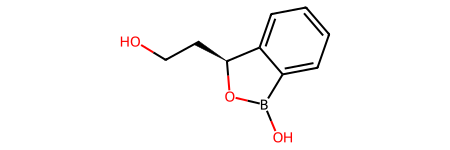

In [69]:
m1 = df.query('match').mol.values[9]
m1

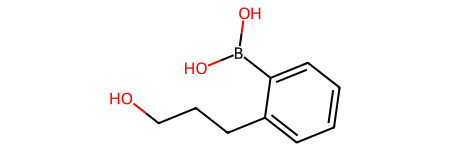

In [106]:
boronate_deprotect = "[#8:1][#5:2]1[#6:6][#6:5][#6:4][#8:3]-1>>[#6:4][#6:5][#6:6][#5:2]([#8:3])[#8:1]"
boronate_rxn = AllChem.ReactionFromSmarts(boronate_deprotect)
boronate_rxn.RunReactants([m1])[0][0]

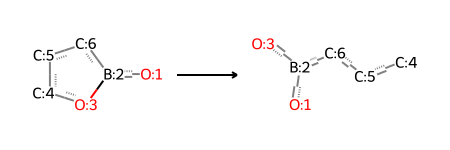

In [107]:
boronate_rxn

In [76]:
boronate_df = df.query('match').copy()
for i in range(0,20):
    mol = boronate_df.mol.values[i]
    prod = boronate_rxn.RunReactants([mol])
    print(Chem.MolToSmiles(mol),prod)

O=C(O)Cc1cccc2c1B(O)OC2 ((<rdkit.Chem.rdchem.Mol object at 0x3af3c6c70>,),)
O=C(O)c1ccc2c(c1)COB2O ((<rdkit.Chem.rdchem.Mol object at 0x3af3c6dc0>,),)
COC(=O)c1ccc2c(c1)B(O)OC2 ((<rdkit.Chem.rdchem.Mol object at 0x3af3c6c70>,),)
Nc1ccc2c(c1)COB2O ((<rdkit.Chem.rdchem.Mol object at 0x3af3c6dc0>,),)
OB1OCc2cc3c(cc21)OCCO3 ((<rdkit.Chem.rdchem.Mol object at 0x3af3c6c70>,),)
O=C(O)c1ccc2c(c1)B(O)OC2 ((<rdkit.Chem.rdchem.Mol object at 0x3af3c6dc0>,),)
O=C(O)C[C@H]1OB(O)c2ccccc21 ((<rdkit.Chem.rdchem.Mol object at 0x3af3c6c70>,),)
O=C(O)C[C@@H]1OB(O)c2ccccc21 ((<rdkit.Chem.rdchem.Mol object at 0x3af3c6dc0>,),)
Nc1cccc2c1COB2O ((<rdkit.Chem.rdchem.Mol object at 0x3af3c6c70>,),)
OCC[C@@H]1OB(O)c2ccccc21 ((<rdkit.Chem.rdchem.Mol object at 0x3af3c6dc0>,),)
Nc1ccc2c(c1)B(O)OCC2 ()
OCC[C@H]1OB(O)c2ccccc21 ((<rdkit.Chem.rdchem.Mol object at 0x3af3c6dc0>,),)
OCc1cc2c(cc1F)COB2O ((<rdkit.Chem.rdchem.Mol object at 0x3af3c6c70>,),)
O=Cc1ccc2c(c1)B(O)OC2 ((<rdkit.Chem.rdchem.Mol object at 0x3af3c6dc0>,)

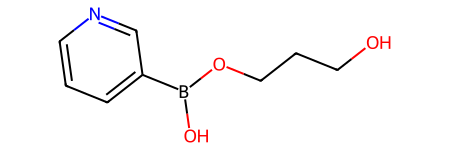

In [78]:
Chem.MolFromSmiles("OCCCOB(O)c1cccnc1")

In [41]:
suzuki = "[#6;a;D3;$([#6]([#6])[#6]):1]-[#5]([#8;A;D1a])[#8;A;D1].[#6;a;D3;$([#6](~[#6])~[#6]):2][#53;A;D1]>>[#6:2]-[#6:1]"

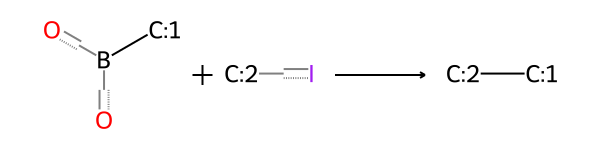

In [49]:
rxn = AllChem.ReactionFromSmarts(suzuki)
rxn

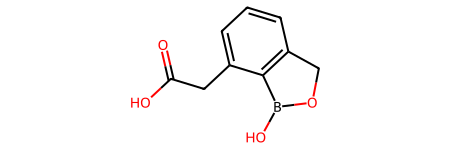

In [44]:
m1 = Chem.MolFromSmiles("O=C(O)Cc1cccc2c1B(O)OC2")
m1

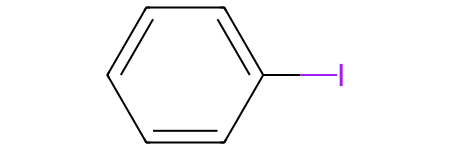

In [47]:
m2 = Chem.MolFromSmiles("c1ccccc1I")
m2

In [48]:
rxn.RunReactants([m1,m2])

()

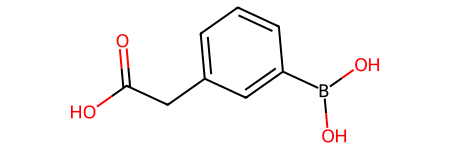

In [50]:
Chem.MolFromSmiles("O=C(O)Cc1cccc(B(O)O)c1")

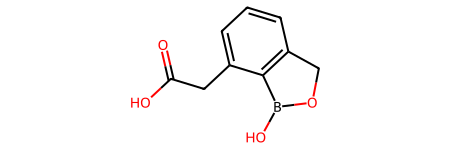

In [51]:
Chem.MolFromSmiles("O=C(O)Cc1cccc2c1B(O)OC2")

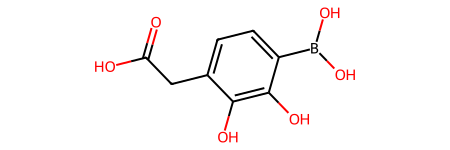

In [55]:
Chem.MolFromSmiles("O=C(O)Cc1ccc(B([OH])([OH]))c(O)c1O")

In [58]:
deprotect = "[*:1][B]1O[#6:2]-[#6:3]O1.O>>[*:1][B]([OH])([OH]).O[#6:2]-[#6:3]O"
depro_rxn = AllChem.ReactionFromSmarts(deprotect)

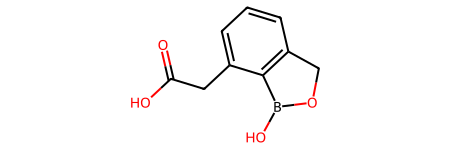

In [61]:
m1

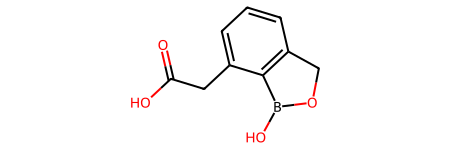

In [62]:
m1

In [65]:
from rdkit.Chem.rdDeprotect import DeprotectInPlace

In [66]:
DeprotectInPlace(m1)

False

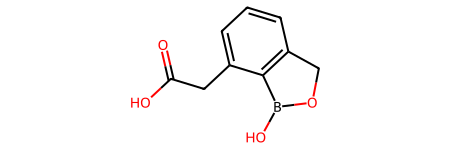

In [67]:
m1

In [69]:
from rdkit.Chem.rdDeprotect import GetDeprotections

In [73]:
for v in GetDeprotections():
    print(v.reaction_smarts)

CC(C)([Si](C)(C)[O;H0:1])C>>[O;H1:1]
COc1ccc(C([O;H0:1])(c2ccccc2)c2ccccc2)cc1>>[O;H1:1]
O1C([O;H0:1])[C;H2][C;H2][C;H2][C;H2]1>>[O;H1:1]
[C;H3][O;X2&R0][C;H2&R0][O;H0:1]>>[O;H1:1]
[C;R0][O;R0][C;R0][C;R0][O;R0][C;R0][O;X2:1]>>[O;H1:1]
[O;!$(*C(=O)):1]c1[c;H1][c;H1][c;H1][c;H1][c;H1]1>>[O;H1:1]
[O;H0&X2:1][Si]([C;H3])([C;H3])([C;H3])>>[O;H1:1]
[O;H0:1]C(=O)c1[c;H1][c;H1][c;H1][c;H1][c;H1]1>>[O;H1:1]
[O;H0:1][C;R0](=O)[C;R0]([C;H3])([C;H3])[C;H3]>>[O;H1:1]
[O;H0:1][Si](C(C)C)(C(C)C)(C(C)C)>>[O;H1:1]
[O;R0:1][C;R0](=O)[C;H3]>>[O:1]
[c;H1]1[c;H1]c(O[C;H3])[c;H1][c;H1]c1[C;H2][O;D2&R0:1]>>[O;H1:1]
c1ccc(C([NX3;H0,H1,H2:1])(c2ccccc2)c2ccccc2)cc1>>[N:1]
O=C1[N;H0:1]C(c2[c;H1][c;H1][c;H1][c;H1]c21)=O>>[N:1]
[#7:1]COCC[Si]([C;R0])([C;R0])[C;R0]>>[#7:1]
[C;H3;R0][O;R0]c1[c;H1][c;H1][c]([NX3;H0,H1;!$(NC=O):1])[c;H1][c;H1]1>>[N:1]
[C;H3]c1[c;H1][c;H1]c(S(=O)(=O)[NX3;H0,H1;!$(NC=O):1])[c;H1][c;H1]1>>[N:1]
[C;R0][C;R0]([C;R0])([O;R0][C;R0](=[O;R0])[NX3;H0,H1:1])C>>[N:1]
[N;H0,H1:1]C(=O)C(F)(F)F>>[N

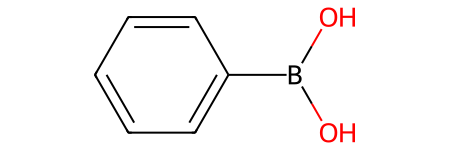

In [104]:
simple_rxn = AllChem.ReactionFromSmarts("[B:3][O;H0:1][C:2]>>[B:3][O;H1:1].[C:2]")
simple_rxn.RunReactants([m1])[0][0]

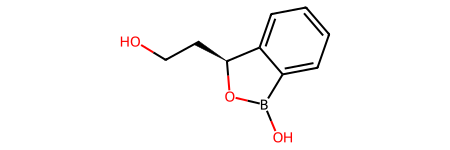

In [95]:
m1

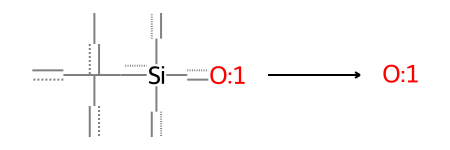

In [105]:
AllChem.ReactionFromSmarts("CC(C)([Si](C)(C)[O;H0:1])C>>[O;H1:1]")